#### Cluster analysis to cluster similar coins

In [53]:
# coin price clustering with k-means

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn-pastel')

import warnings
warnings.filterwarnings('ignore')

In [11]:
'''
Function to load price data from disk 
'''
def load_data(symbol,years,path):
    
    for count,year in enumerate(years):
        if count == 0:
            df = pd.read_csv(path + '/' + str(year) + '/' + symbol + '.csv')
        else:
            df = pd.concat([df,pd.read_csv(path + '/' + str(year) + '/' + symbol + '.csv')]) 
    
    df = df.reset_index(drop=True)
    
    return df

In [20]:
# set configuration
path = '/Users/steve/coinpix/'  
years=[2019,2020,2021]  

# get coins to analyze
coins = pd.read_csv(path + 'coins.csv',header=None).values[0]    

# create an Empty DataFrame object
df = pd.DataFrame()

# load data for coins into columns
for coin in coins:
    df[coin] = load_data(coin,years,path+'price-data/')['Close']

In [25]:
df.head()

,BTC,ETC,ADA,DOGE,XRP,HEX,BCH,LTC,LINK,MATIC,...,BTS,CVC,DERO,MLN,TOMO,AVA,ARDR,XHV,ETN,BCN
0,3843.520020,5.227261,0.042547,0.002392,0.364771,0.000171,164.854599,31.979931,0.299371,0.004421,...,0.039627,0.054520,0.938746,7.560998,0.307361,0.162806,0.054271,0.710078,0.007622,0.000716
1,3943.409424,5.438700,0.045258,0.002407,0.375243,0.000265,171.827377,33.433681,0.316489,0.003471,...,0.041815,0.055390,0.928734,8.699044,0.338898,0.153119,0.054969,0.715383,0.007734,0.000725
2,3836.741211,5.094617,0.042682,0.002360,0.360224,0.000256,162.049927,32.026699,0.365974,0.004478,...,0.039650,0.053987,0.862939,8.319635,0.324398,0.146013,0.054125,0.655627,0.007458,0.000706
3,3857.717529,5.254148,0.043812,0.002315,0.356747,0.000129,161.395630,32.404167,0.437175,0.004374,...,0.039895,0.054517,0.883271,8.566726,0.287430,0.138265,0.056234,0.678547,0.007379,0.000690
4,3845.194580,5.136273,0.044701,0.002319,0.355275,0.000218,160.401215,34.936867,0.395948,0.004198,...,0.039658,0.054707,0.910166,8.534426,0.291817,0.135108,0.060984,0.660816,0.007303,0.000707


In [32]:
# find expected annual returns and variance for clustering
expected_return = df.pct_change().mean()*365
variance = df.pct_change().var()*365

In [40]:
# empty dataframe for clustering
final_df = pd.DataFrame()

# add coins column
final_df['coin'] = df.columns

# add return values
final_df['return'] = expected_return.values

# add variance values
final_df['variance'] = variance.values

In [42]:
final_df.head()

,coin,return,variance
0,BTC,1.179525,0.566068
1,ETC,1.572186,1.471802
2,ADA,2.057490,1.319614
3,DOGE,3.589713,5.659477
4,XRP,0.972929,1.502262


In [44]:
# find optinum number of clusters using elbow method

colnames = ['return','variance'] # column names for training
inertia = [] # list to hold inertia values for each K value

# set training values
X = final_df[colnames].values

# train model for cluster sizes 2 to 10
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # append inertia to list

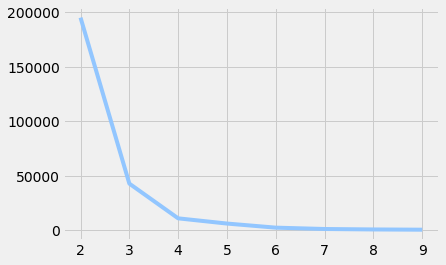

In [54]:
plt.plot(range(2,10), inertia)
plt.show()  # best number of clusters k=4

In [57]:
# kmeans clustering for k=4
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_

# add labels to dataframe
final_df['cluster'] = labels

final_df.head()

,coin,return,variance,cluster
0,BTC,1.179525,0.566068,0
1,ETC,1.572186,1.471802,0
2,ADA,2.057490,1.319614,0
3,DOGE,3.589713,5.659477,0
4,XRP,0.972929,1.502262,0


In [70]:
final_df['variance'].max()

936.2889080574914

In [71]:
final_df[final_df.variance>900]  

,coin,return,variance,cluster
31,CHZ,19.917897,936.288908,1


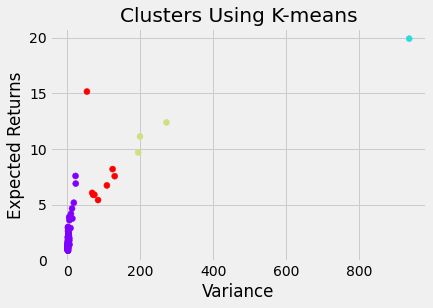

In [69]:
# plot clusters
plt.scatter(X[:,1],X[:,0], c=labels, cmap='rainbow')
plt.title('Clusters Using K-means')
plt.xlabel('Variance')
plt.ylabel('Expected Returns')
plt.show()

In [72]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0])